In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from word2number import w2n

In [52]:
df = pd.read_csv("hiring.csv")
mean_test_score = df["test_score(out of 10)"].mean()

In [53]:
df["experience"].fillna(value="zero", inplace = True)

mean_test_score = df["test_score(out of 10)"].mean()
df["test_score(out of 10)"].fillna(value = mean_test_score, inplace = True)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.000000,9,50000
1,zero,8.000000,6,45000
2,five,6.000000,7,60000
3,two,10.000000,10,65000
4,seven,9.000000,6,70000
5,three,7.000000,10,62000
6,ten,7.857143,7,72000
7,eleven,7.000000,8,80000


In [54]:
df['experience'] = df['experience'].apply(w2n.word_to_num)


In [57]:
X = df[["experience", "test_score(out of 10)", "interview_score(out of 10)"]]
y = df["salary($)"]
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.000000,9,50000
1,0,8.000000,6,45000
2,5,6.000000,7,60000
3,2,10.000000,10,65000
4,7,9.000000,6,70000
5,3,7.000000,10,62000
6,10,7.857143,7,72000
7,11,7.000000,8,80000


In [58]:
model = linear_model.LinearRegression()
model.fit(X, y)


LinearRegression()

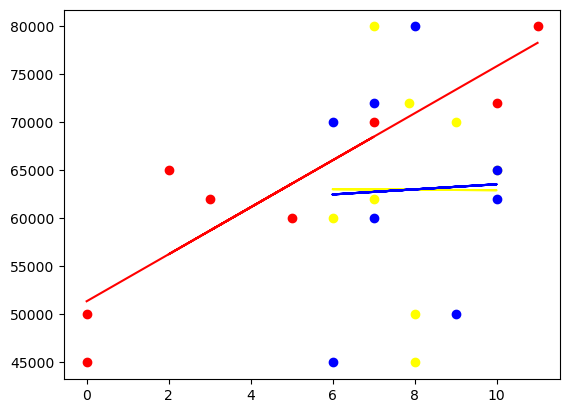

In [71]:
%matplotlib inline

plt.scatter(df["experience"], y, label = "data points", color = "red")
m, b = np.polyfit(df["experience"], y, 1)
plt.plot(df["experience"], m * df["experience"] + b, color = "red", label = "regression line")

plt.scatter(df["test_score(out of 10)"], y, label = "data points", color = "yellow")
m, b = np.polyfit(df["test_score(out of 10)"], y, 1)
plt.plot(df["test_score(out of 10)"], m * df["test_score(out of 10)"] + b, color = "yellow", label = "regression line")

plt.scatter(df["interview_score(out of 10)"], y, label = "data points", color = "blue")
m, b = np.polyfit(df["interview_score(out of 10)"], y, 1)
plt.plot(df["interview_score(out of 10)"], m * df["interview_score(out of 10)"] + b, color = "blue", label = "regression line")

In [60]:
predictions = model.predict(np.array([[2, 9, 6], [12, 10, 10]]))

C:\Users\nyasa\Downloads\ANACONDA\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [61]:
predictions

array([53290.89255945, 92268.07227784])

In [62]:
model.intercept_

(array([2827.63404314, 1912.93803053, 2196.9753141 ]), 17237.330313727172)

In [66]:
m1, m2, m3 = model.coef_

In [67]:
m1, m2, m3

(2827.634043143513, 1912.9380305338782, 2196.975314104756)